In [24]:
import torch
import timeit 
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)

device = torch.device("cpu")

if(torch.cuda.is_available()):
    device = torch.device("cuda")

print(f"Torch Device: {device}")

Torch Device: cuda


### Question 1

Write a series of `for` loops that compute the average value in `torch_tensor3d`.

I'm assuiming here that you by a manual means and not something like `torch.mean`

In [2]:
example_tensor = torch.rand(3,3,3)
print(example_tensor)

manual_mean = 0
elements = torch.numel(example_tensor)

x, y, z = example_tensor.shape

for i in range(x):
    for j in range(y):
        for k in range(z):
            manual_mean += example_tensor[i][j][k]/elements
            
print(f"Manual Mean calculated result: {manual_mean}")


torch_mean = torch.mean(example_tensor)
print(f"Torch Mean calculated result: {torch_mean}")

tensor([[[0.7576, 0.2793, 0.4031],
         [0.7347, 0.0293, 0.7999],
         [0.3971, 0.7544, 0.5695]],

        [[0.4388, 0.6387, 0.5247],
         [0.6826, 0.3051, 0.4635],
         [0.4550, 0.5725, 0.4980]],

        [[0.9371, 0.6556, 0.3138],
         [0.1980, 0.4162, 0.2843],
         [0.3398, 0.5239, 0.7981]]])
Manual Mean calculated result: 0.5100202560424805
Torch Mean calculated result: 0.5100201964378357


### Question 2

Write code that indexes into torch_tensor3d and prints out the value 13. 


__I'll be honest here ~ I don't exactly know what this question is asking, Maybe I'm being EXTRA dumb, but I don't see any other solution__

In [41]:
example_tensor = torch.rand(20,20,20)

print(example_tensor[0][0][0])

example_tensor[0][0][0] = 13

print(example_tensor[0][0][0])

tensor(0.8048)
tensor(13.)


### Question 3

For every power of 2 (i.e., 2i or 2**i ) up to 2^11, create a random matrix X ∈ ℝ2i, 2i (i.e., X.shape should give (2**i, 2**i)). Time how long it takes to compute XX (i.e., X @ X) on a CPU and on a GPU, and plot the speedup. For what matrix sizes is the CPU faster than the GPU? 

Is Cuda avalaible? YES
CPU is faster than GPU until a power size of 8


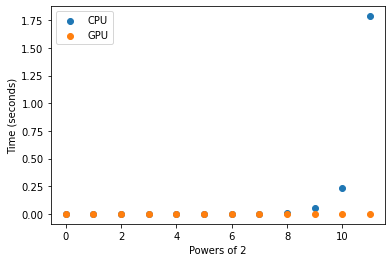

In [37]:
print("Is Cuda avalaible?", "YES" if torch.cuda.is_available() else "NO")

powers = []
cpu_times = []
gpu_times = []


for i in range(12):
    x = torch.rand(2**i, 2**i)
    y = torch.rand(2**i, 2**i).to(device)
    cpu_time = timeit.timeit("x@x", globals=globals(), number=100)
    gpu_time = timeit.timeit("y@y", globals=globals(), number=100)
    cpu_times.append(cpu_time)
    gpu_times.append(gpu_time)
    powers.append(i)
    
fastest_size = 0
while (cpu_times[fastest_size] < gpu_times[fastest_size]):
    fastest_size += 1
    
print(f"CPU is faster than GPU until a power size of {fastest_size + 1}")

plt.scatter(powers, cpu_times, label="CPU")
plt.scatter(powers, gpu_times, label="GPU")
plt.legend(loc="upper left")
plt.xlabel('Powers of 2')
plt.ylabel("Time (seconds)")
plt.show()

### Question 5

Write a new function that takes two inputs, x and y, where f(x, y) = exp (sin(x)2)/(x−y)2 + (x−y)2 Use an Optimizer with initial parameter values of x = 0.2 and y = 10. What do they converge to? 

In [6]:
def f(x, y):
    return (torch.exp(torch.pow(torch.sin(x), 2))/torch.pow(x-y, 2)) + torch.pow(x-y, 2)

x_param = torch.nn.Parameter(torch.tensor([0.2]), requires_grad=True)
y_param = torch.nn.Parameter(torch.tensor([10.0]), requires_grad=True)

learning_rate = .001

params = [x_param, y_param]

optimizer = torch.optim.SGD(params, lr=learning_rate)


for epoch in range(100000):
    optimizer.zero_grad()
    loss_incurred = f(x_param, y_param).to(device)
    loss_incurred.backward() 
    optimizer.step()

print("X: ", x_param.data)
print("Y: ", y_param.data)

X:  tensor([3.1418])
Y:  tensor([4.1418])
